In [1]:
import model

Using TensorFlow backend.


Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_cls_score/Reshape_1:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_2:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape_1:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
Tensor_name is :  rpn_conv/3x3/biases
Tensor_name is :  rpn_cls_score/weights
Tensor_name is :  rpn_bbox_pred/biases
Tensor_name is :  lstm_o/weights
Tensor_name is :  lstm_o/bidirectional_rnn/fw/lstm_cell/bias
Tensor_name is :  lstm_o/bidirectional_rnn/bw/lstm_cell/kernel
Tensor_name is :  lstm_o/bidirectional_rnn/bw/lstm_cell/bias
Tensor_name is : 

In [2]:
from glob import glob
from IPython.display import Image as display
import numpy as np
from PIL import Image
import time
import os
from tqdm import tqdm

CONTRACTS_PATH = '/home/aaron/downloads/租赁合同/瑞思'
CONTRACT_NAME = '亦庄二校租赁合同扫描件'
OCR_RES_PATH = os.path.join(CONTRACTS_PATH, '_'.join([CONTRACT_NAME, 'ocr']))
OCR_DETECT_PATH = os.path.join(OCR_RES_PATH, 'detect')
if not os.path.exists(OCR_DETECT_PATH):
    os.makedirs(OCR_DETECT_PATH)

OCR_TEXT_PATH = os.path.join(OCR_RES_PATH, 'text')
if not os.path.exists(OCR_TEXT_PATH):
    os.makedirs(OCR_TEXT_PATH)

ALL_TEXT_TXT = os.path.join(OCR_TEXT_PATH, 'all_text.txt')

FAILED_TXT = os.path.join(OCR_RES_PATH, 'failed.txt')
    
paths = glob(os.path.join(CONTRACTS_PATH, CONTRACT_NAME, '*.*'))
paths

['/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_1.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_5.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_14.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_4.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_6.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_2.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_10.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_0.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_13.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_3.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_7.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_12.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_8.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_9.png',
 '/home/aaron/downloads/租赁合同/瑞思/亦庄二校租赁合同扫描件/images_11.png']

## pytorch crnn

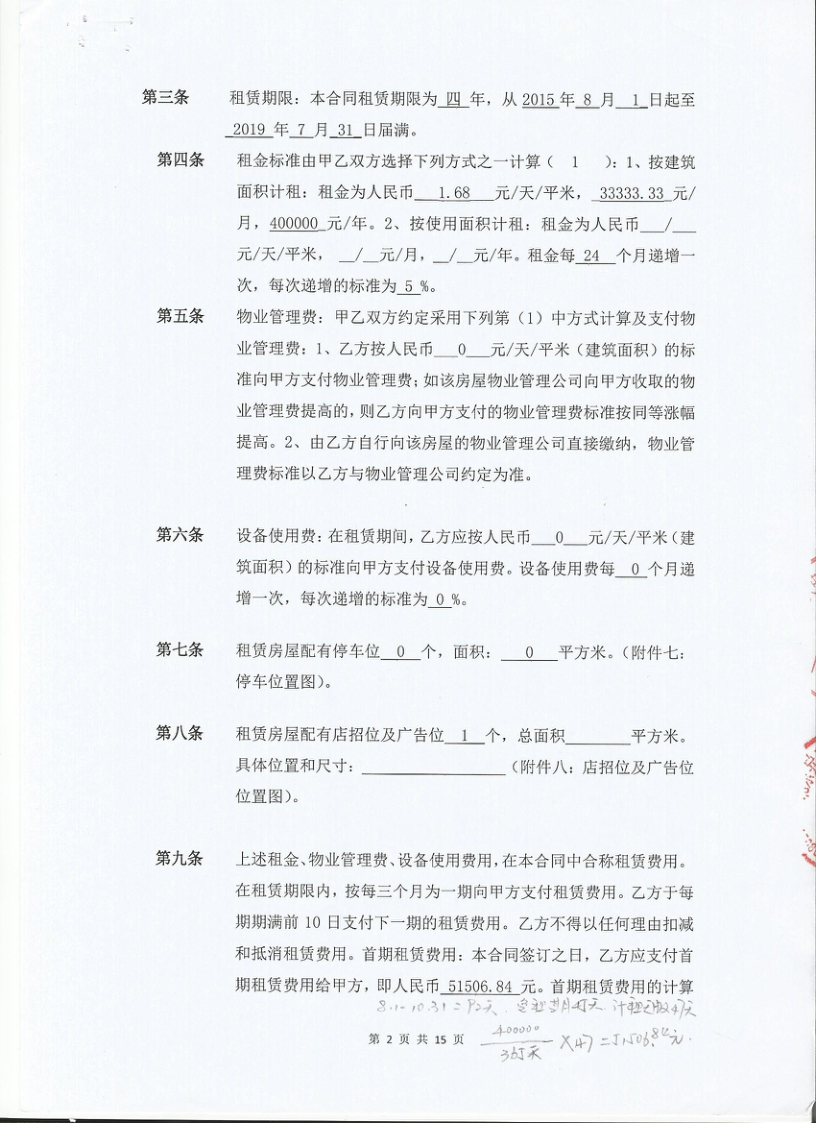

In [3]:
img_file = paths[0]
im = Image.open(img_file)
im

It takes time:11.658047676086426s
---------------------------------------
图像的文字朝向为:0度
 识别结果:

第三条
租赁期限:本合同租赁期限为四年，从2015年_8月-1日起至
2019年7月_31日届满。
第四条租金标准由甲乙双方选择下列方式之一计算-1)-1、按建筑
面积计租:租金为人民币-.&-元/天/平米，33333.3元/
月，400000元/年。2、按使用面积计租:租金为人民币-/
元/天/平米，-/-元/月，-/-元/年。租金每-24-个月邀增一
次，每次递增的标准为5%
第五条”物业管理费:甲乙双方约定采用下列第-1-中方式计算及支付物
业管理费:1、乙方按人民币-0-元/天/平米-建筑面积-的标
准向甲方支付物业管理费;如该房屋物业管理公司向甲方收取的物
业管理费提高的,则乙方向甲方支付的物业管理费标准按同等涨幅
提高。2、由乙方自行向该房屋的物业管理公司直接缴纳，物业管
理数标准以乙方与物业管理公司约定为准。
第六条”设备使用费:在租赁期间,乙方应按人民币-0-元/天/平米(建
筑面积-的标准向甲方支付设备使用费。设备使用费每-0-个月递
增一次，每次递增的标准为0%
第七条租赁房屋配有停车位-0-个，面积:_0平方米。-附件七:
停车位置图)-
第八条租赁房屋配有店招位及广告位-1-个，总面积-
平方米。
具体位置和尺寸:
附件八:店招位及广告位
位置图，
第九条上述和金,物业管理费,设备使用费用,在本合同中合称租赁费用
在租赁期限内，按每三个月为一期向甲方支付租负费用。乙方于每
期期满前10日支付下一期的租赁费用。乙方不得以任何理由扣减
和抵消租赁费用。首期租赁费用:本合同签订之日，乙方应支付首
期租赁费用给甲方，即人民币51506.84元。首期租赁费用的计算
8---‘内入当江对A盯-计初战戈
第2贝共15贝--一X门)=1，%
M天


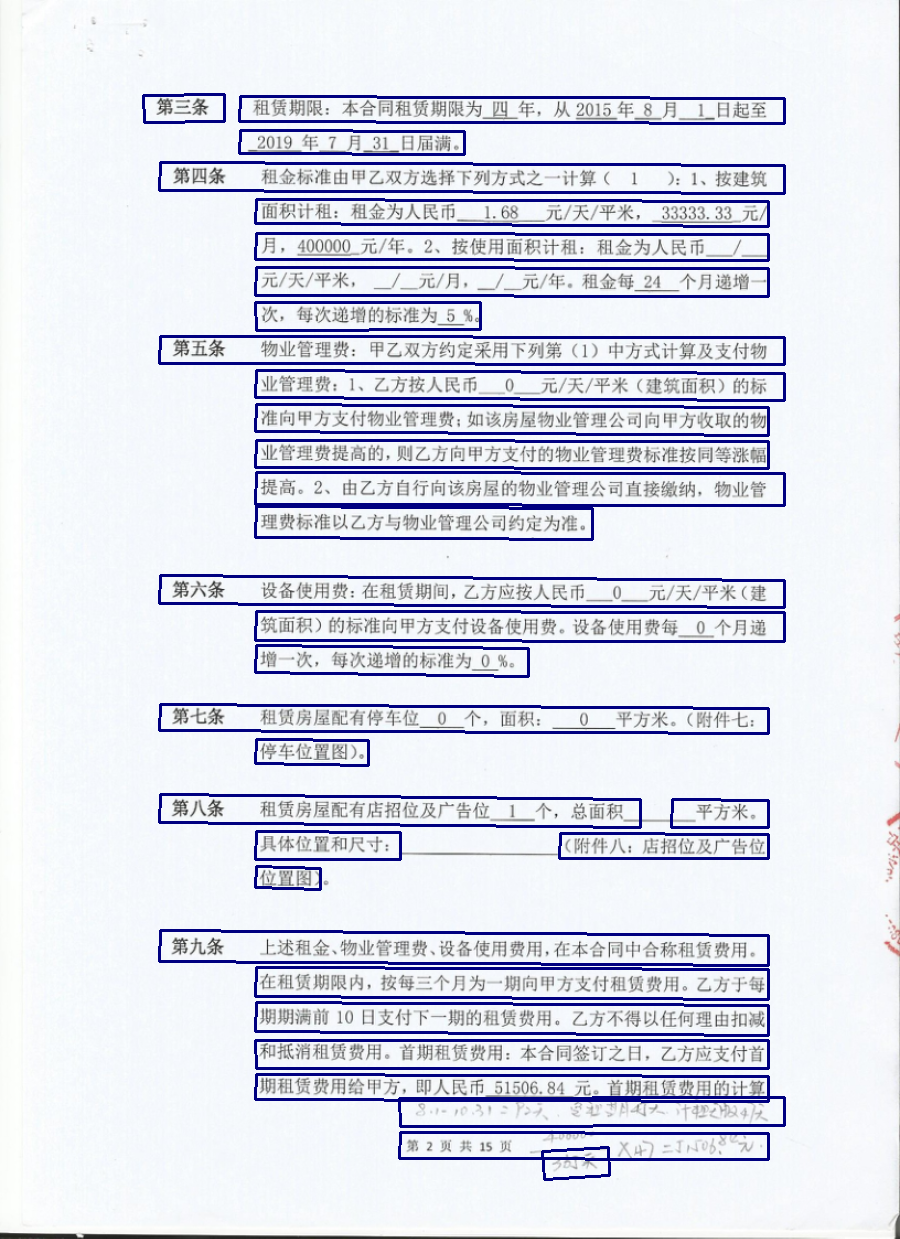

In [4]:
im = Image.open(img_file)
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='crnn', detectAngle=False) ## if model == crnn ,you should install pytorch
print("It takes time:{}s".format(time.time()-t))
print("---------------------------------------")
print("图像的文字朝向为:{}度\n".format(angle),"识别结果:\n")

for key in result:
    print(result[key][1])
    
Image.fromarray(img)

In [5]:
def ocr(img_file):
    fn_ext = os.path.basename(img_file)
    fn, ext = os.path.splitext(fn_ext)
    _, idx_str = fn.strip().split('_')
    im = Image.open(img_file)
    img = np.array(im.convert('RGB'))
    t = time.time()
    try:
        result,img,angle = model.model(img,model='crnn', detectAngle=False) ## if model == crnn ,you should install pytorch
    except:
        print('模型运行失败：{}'.format(img_file))
        return -1, img_file
    texts_lists = []
    for key in result:
        texts_lists.append(result[key][1])
    texts = '\n'.join(texts_lists)
    text_file = os.path.join(OCR_TEXT_PATH, 'text_page_{}.txt'.format(idx_str))
    with open(text_file, 'w') as f:
        f.write(texts)
        
    detect_img_file = os.path.join(OCR_DETECT_PATH, 'detect_page_{}.jpg'.format(idx_str))
    img_pil = Image.fromarray(img)
    img_pil.save(detect_img_file)
    return 0, ''

In [6]:
failed_files = []
for img_file in tqdm(paths):
    code, img_file = ocr(img_file)
    if code < 0:
        failed_files.append(img_file)
        
failed_files

100%|██████████| 15/15 [02:53<00:00, 11.86s/it]


[]

In [7]:
if failed_files:
    with open(FAILED_TXT, 'w') as f:
        f.write('\n'.join(failed_files))

In [8]:
with open(ALL_TEXT_TXT, 'a') as f:
    for idx in tqdm(range(len(paths))):
        try:
            text_file = os.path.join(OCR_TEXT_PATH, 'text_page_{}.txt'.format(idx))
            with open(text_file, 'r') as rf:
                text = rf.read()
        except:
            text = '\n'

        f.write('page_{}:\n\n'.format(idx) + text + '\n\n')

100%|██████████| 15/15 [00:00<00:00, 8835.07it/s]
